In [2]:
import numpy as np
def sigmoid_function(x):
  return 1/ (1 + np.exp(-x))

In [4]:
a = np.array([-10,1,10])

In [5]:
sigmoid_function(a)

array([4.53978687e-05, 7.31058579e-01, 9.99954602e-01])

In [6]:
a = np.array([13,14,15])
sigmoid_function(a)

array([0.99999774, 0.99999917, 0.99999969])

In [7]:
a = np.array([13,14,15])
sigmoid_function(a / 15)

array([0.70405163, 0.71775106, 0.73105858])

In [8]:
x = np.arange(-10,10,0.1)

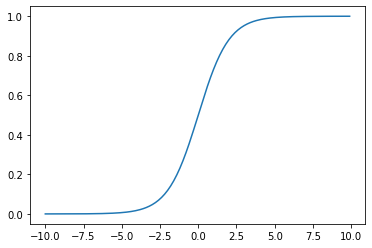

In [9]:
from matplotlib import pyplot as plt
plt.plot(x, sigmoid_function(x))

In [15]:
def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x-h)) / (2*h)


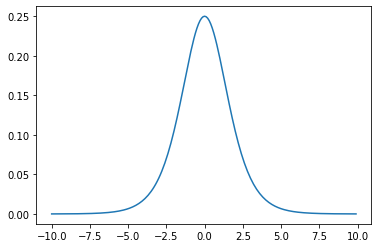

In [16]:
plt.plot(x, dfunc(sigmoid_function, x))

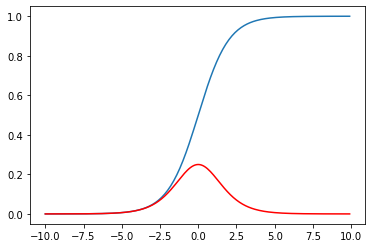

In [17]:
from matplotlib import pyplot as plt
import numpy as np
x = np.arange(-10,10,0.1)
y = sigmoid_function(x)
d_y = dfunc(sigmoid_function,x )
plt.plot(x,y)
plt.plot(x,d_y, c = 'red')

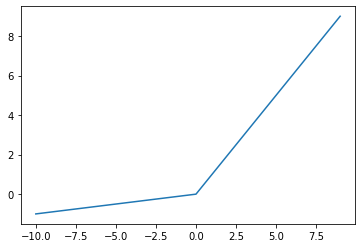

In [20]:
import numpy as np
def leaky_relu(x, t= 0.1):
  return np.maximum(t * x, x)
x = np.arange(-10,10,1)
plt.plot(x, leaky_relu(x))

## SVM

In [21]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data[0:100,[2,3]]
y = iris.target[0:100]

clf1 = SVC(kernel="linear")
clf1.fit(X, y)

clf2 = LogisticRegression()
clf2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()




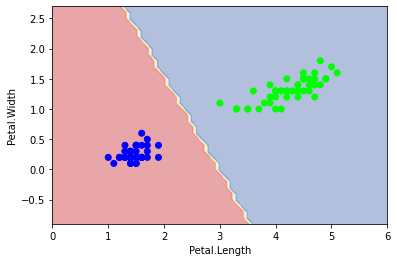

In [23]:
 plot_estimator(clf1, X, y)

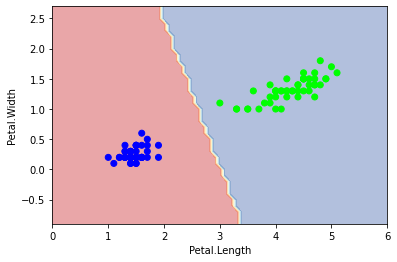

In [25]:
 plot_estimator(clf2, X, y)

In [26]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-0.4,0.5,1],[2,5,1]])
X = data[:, :2] 
Y = data[:,2]




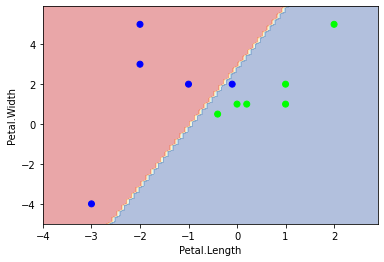

In [27]:
# Large Margin
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

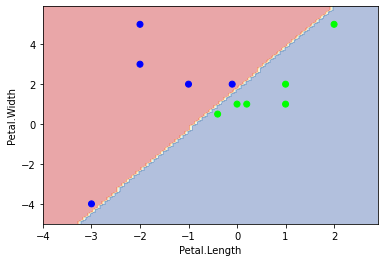

In [28]:
# Narrow Margin
clf = SVC(C=100000, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

In [29]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target


In [30]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

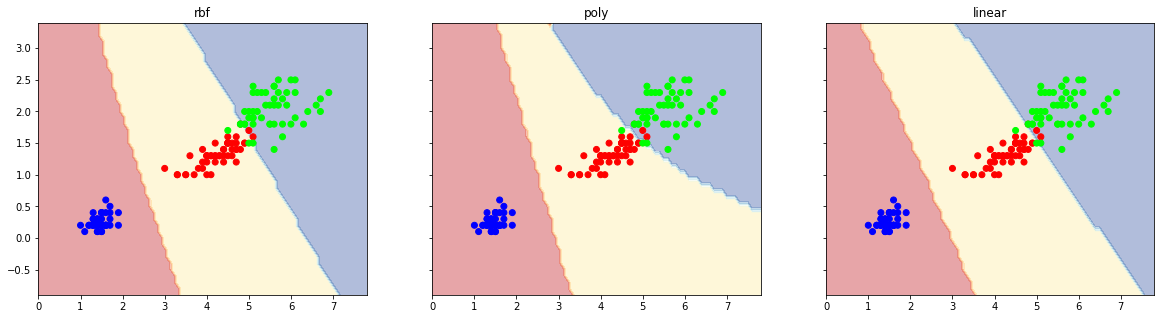

In [31]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    axarr[idx].set_title(title)
